In this notebook we look at image regression, which is kind of a rare topic. In machine learning you have a couple different kinds of categories: what kind of data you're using, and what your task is.

Types of Data:
- Tabular (like a csv)
- Text
- Audio
- Images
- Video

Types of Tasks:
- Clustering
- Reinforcement Learning
- Prediction
  - Classification
  - Regression
  
And quite often, if you're using images as your input data, you're doing classification.

In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import tqdm
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('/kaggle/input/how-much-would-you-pay-for-a-fake-cat/train.csv')

image_dir = '/kaggle/input/part-2-resizing-our-images/resized'
image_data = []
for img_id in tqdm.tqdm(train_df['id']):
    img_path = os.path.join(image_dir, img_id + '.png')
    # Here, to keep our model simple we're reading in in grayscale, but 
    # we can play with this later
    im = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    im = im / 255
    im = np.expand_dims(im, axis=-1)
    image_data.append(im)

100%|██████████| 2000/2000 [00:07<00:00, 275.84it/s]


In [3]:
type(image_data)

list

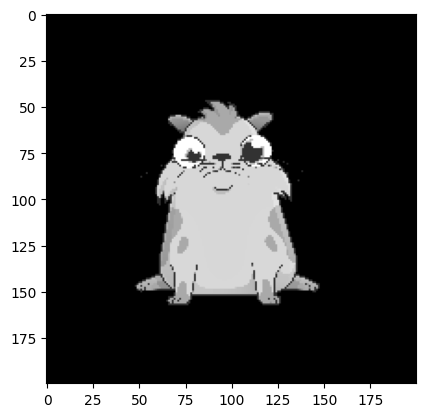

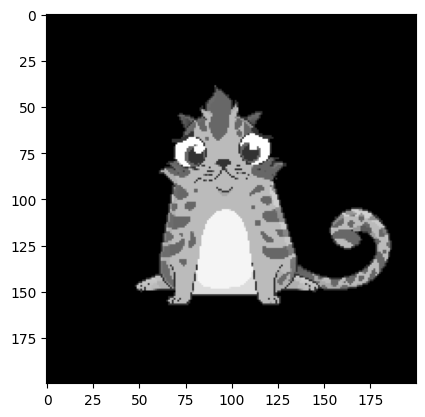

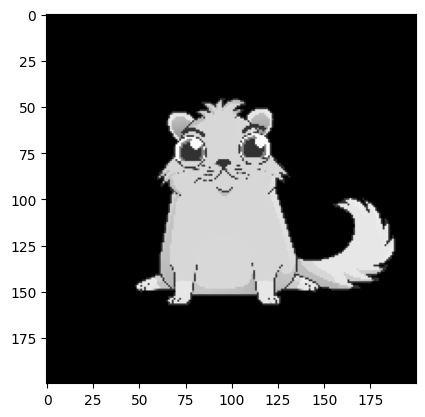

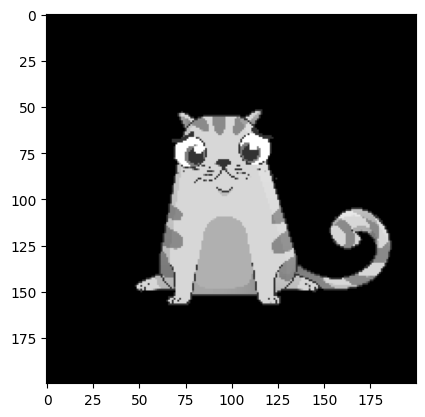

In [4]:
for image in image_data[:4]:
    plt.imshow(image, cmap='gray')
    plt.show()

In [5]:
input_data = np.array(image_data).astype(np.float16)

In [6]:
type(input_data)

numpy.ndarray

In [7]:
train_df['price'] = train_df['price'].apply(lambda p: p.replace(',', ''))
labels = train_df['price'].values.astype(np.float16)
labels = np.clip(labels, 0, 100)
labels

array([ 2.13,  0.46, 10.  , ...,  1.44,  2.5 , 40.  ], dtype=float16)

In [8]:
np.max(labels)

100.0

In [9]:
# Reality check, do we have the same number of input images and labels 
print(len(input_data))
print(len(labels))

2000
2000


In [10]:
input_data[0].shape

(200, 200, 1)

In [11]:
import tensorflow as tf

simple_model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=1)
])

simple_model.compile(loss='mean_absolute_error', optimizer='adam')

history = simple_model.fit(input_data, labels, epochs=100, batch_size=16, verbose=1)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Epoch 1/100
125/125 [==============================] - 3s 3ms/step - loss: 11.9875
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 11.7713
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 11.7419
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 11.9699
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 11.8557
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 11.6655
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 11.7195
Epoch 8/100
125/125 [==============================] - 0s 3ms/step - loss: 11.8831
Epoch 9/100
125/125 [==============================] - 0s 3ms/step - loss: 11.6315
Epoch 10/100
125/125 [==============================] - 0s 2ms/step - loss: 11.6056
Epoch 11/100
125/125 [==============================] - 0s 3ms/step - loss: 11.4475
Epoch 12/100
125/125 [==============================] - 0s 3ms/step - loss: 11.2878
E

In [12]:
simple_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (16, 40000)               0         
                                                                 
 dense (Dense)               (16, 1)                   40001     
                                                                 
Total params: 40,001
Trainable params: 40,001
Non-trainable params: 0
_________________________________________________________________


In [13]:
dense_weights = simple_model.layers[1].get_weights()[0]
dense_weights

array([[0.00574173],
       [0.00071551],
       [0.00692906],
       ...,
       [0.02049472],
       [0.00161444],
       [0.0078719 ]], dtype=float32)

In [14]:
dense_weights.reshape(200,200).shape

(200, 200)

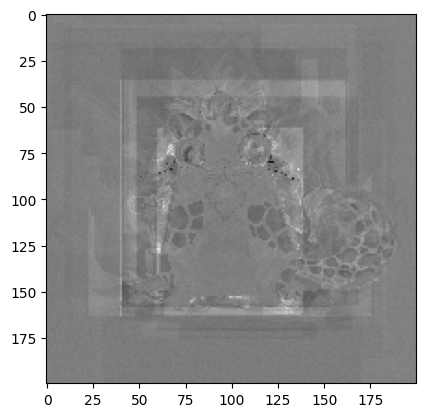

In [15]:
plt.imshow(dense_weights.reshape(200,200), cmap='gray')

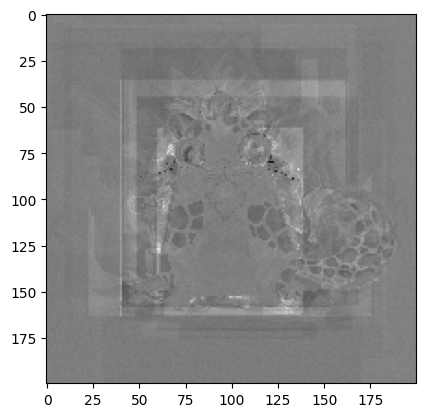

In [16]:
plt.imshow(dense_weights.reshape(200,200), cmap='gray')

In [17]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=64),
    tf.keras.layers.Dense(units=1)
])

model.compile(loss='mean_absolute_error', optimizer='adam')
history = model.fit(input_data, labels, epochs=50, batch_size=16, verbose=1)

Epoch 1/50
125/125 [==============================] - 2s 3ms/step - loss: 16.7120
Epoch 2/50
125/125 [==============================] - 0s 3ms/step - loss: 13.1637
Epoch 3/50
125/125 [==============================] - 0s 3ms/step - loss: 12.2387
Epoch 4/50
125/125 [==============================] - 0s 3ms/step - loss: 11.6259
Epoch 5/50
125/125 [==============================] - 0s 3ms/step - loss: 11.5342
Epoch 6/50
125/125 [==============================] - 0s 3ms/step - loss: 11.3575
Epoch 7/50
125/125 [==============================] - 0s 3ms/step - loss: 11.4607
Epoch 8/50
125/125 [==============================] - 0s 3ms/step - loss: 11.4074
Epoch 9/50
125/125 [==============================] - 0s 3ms/step - loss: 11.2854
Epoch 10/50
125/125 [==============================] - 0s 3ms/step - loss: 11.3097
Epoch 11/50
125/125 [==============================] - 0s 3ms/step - loss: 11.5359
Epoch 12/50
125/125 [==============================] - 0s 3ms/step - loss: 11.5587
Epoch 13/50
1

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (16, 40000)               0         
                                                                 
 dense_1 (Dense)             (16, 64)                  2560064   
                                                                 
 dense_2 (Dense)             (16, 1)                   65        
                                                                 
Total params: 2,560,129
Trainable params: 2,560,129
Non-trainable params: 0
_________________________________________________________________


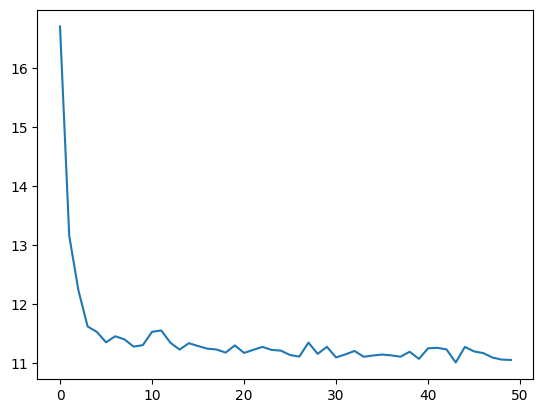

In [19]:
# Let's actually visualize how our performance changes over time
plt.plot(history.history['loss'])

In [20]:
# Lets create a validation set so we can get a sense of how well our model generalizes:

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=256),
    tf.keras.layers.Dense(units=1)
])

model.compile(loss='mean_absolute_error', optimizer='adam')
history = model.fit(
    input_data,
    labels,
    validation_split=0.1,
    epochs=50, batch_size=16, verbose=0)

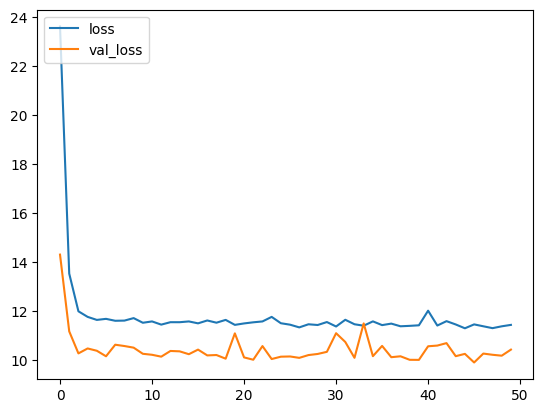

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'], loc='upper left')

# Making Predictions on Our Test Data

In [22]:
test_df = pd.read_csv('/kaggle/input/how-much-would-you-pay-for-a-fake-cat/test.csv')

image_dir = '/kaggle/input/part-2-resizing-our-images/resized'
test_image_data = []
for img_id in tqdm.tqdm(test_df['id']):
    img_path = os.path.join(image_dir, img_id + '.png')
    # Here, to keep our model simple we're reading in in grayscale, but 
    # we can play with this later
    im = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    im = im / 255
    im = np.expand_dims(im, axis=-1)
    test_image_data.append(im)

100%|██████████| 120/120 [00:00<00:00, 237.18it/s]


In [23]:
test_input_data = np.array(test_image_data).astype(np.float16)

In [24]:
predictions = model.predict(test_input_data)

4/4 [==============================] - 0s 3ms/step


In [25]:
test_df['price'] = predictions

In [26]:
submission_df = test_df[['id', 'price']]

In [27]:
submission_df.to_csv('submission.csv', index=False)

## To finish off dense neural networks, lets do a little experiment

In [28]:
def test_hidden_layer_size(n):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=n),
        tf.keras.layers.Dense(units=1)
    ])

    model.compile(loss='mean_absolute_error', optimizer='adam')
    history = model.fit(
        input_data,
        labels,
        validation_split=0.1,
        epochs=20, batch_size=64, verbose=0)
    return history

In [29]:
# for n in [32, 512, 2048]:
#     history = test_hidden_layer_size(n)
#     final_val_loss = history.history['val_loss'][-1]
#     plt.title(f'Hidden Layer: {n}; Val Loss: {final_val_loss}')
#     plt.plot(history.history['loss'][1:])
#     plt.plot(history.history['val_loss'][1:])
#     plt.legend(['loss', 'val_loss'], loc='upper left')
#     plt.show()
    

# Time for Convolutions!